# Work with Multiple Time Series

## Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

## Working with more than one time series

### Load multiple time series

In [7]:
url_meat = 'https://assets.datacamp.com/production/course_5226/datasets/ch4_meat.csv'

In [8]:
# Read in meat DataFrame
meat = pd.read_csv(url_meat)

# Review the first five lines of the meat DataFrame
print(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
print(meat.describe())

         date   beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
0  1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1  1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
2  1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
3  1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
4  1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

   turkey  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
              beef        veal         pork  lamb_and_mutton     broilers  \
count   827.000000  827.000000   827.000000       827.000000   635.000000   
mean   1683.463362   54.198549  1211.683797        38.360701  1516.582520   
std     501.698480   39.062804   371.311802        19.624340   963.012101   
min     366.000000    8.800000   124.000000        10.900000   250.900000   
25%    1231.500000   24.000000   934.500000        23.00

### Visualize multiple time series

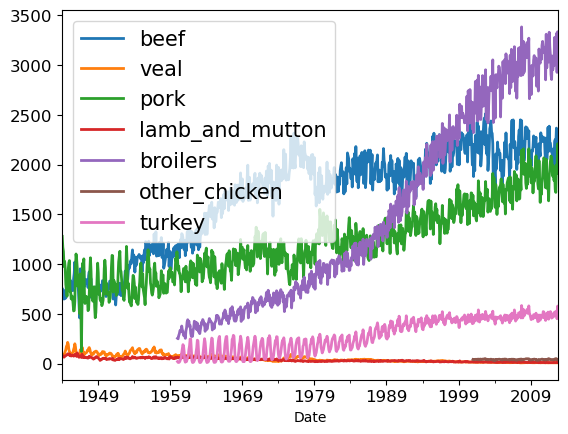

In [12]:
# Plot time series dataset
ax = meat.plot(fontsize=12, linewidth=2)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

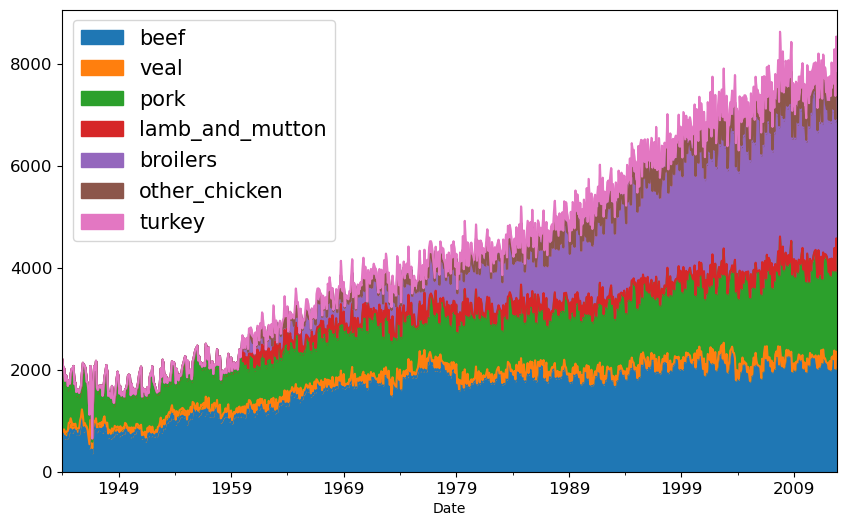

In [15]:
# Plot an area chart
ax = meat.plot.area(figsize=(10, 6), fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

## Plot multiple time series

### Define the color palette of your plots

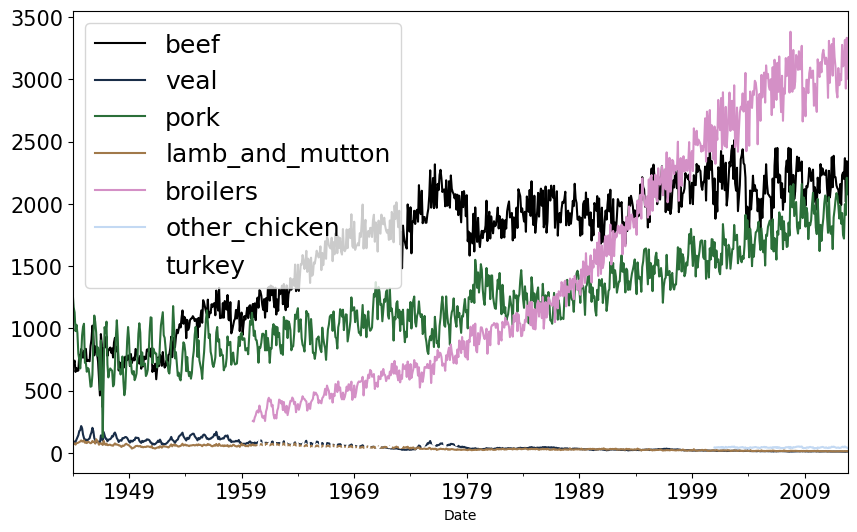

In [17]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15, figsize=(10, 6))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

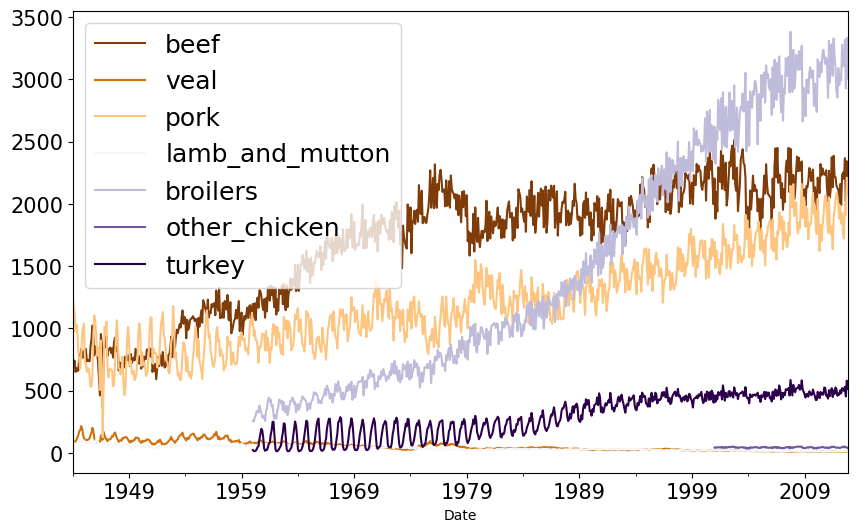

In [18]:
# Plot time series dataset using the PuOr color palette
ax = meat.plot(colormap='PuOr', fontsize=15, figsize=(10, 6))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

### Add summary statistics to your time series plot

In [32]:
meat_mean =meat.describe().iloc[[1]]

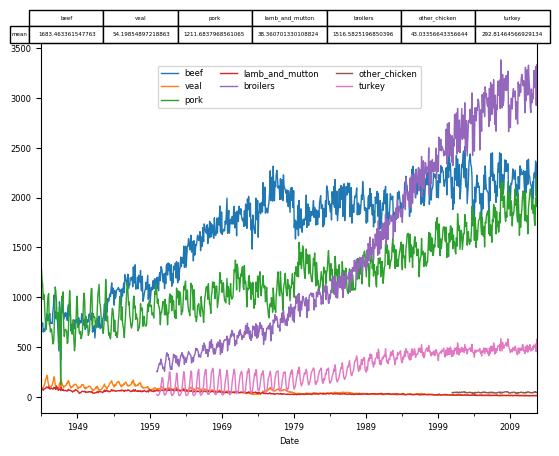

In [33]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

### Plot your time series on individual plots

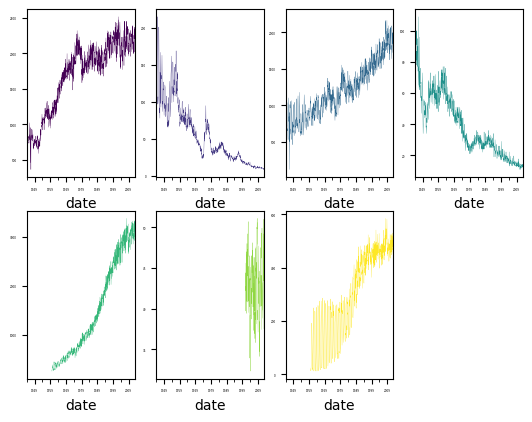

In [35]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout=(2, 4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)

plt.show()

## Find relationships between multiple time series

### Compute correlations between time series

In [38]:
# Compute the correlation between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.828)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.828


In [41]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr(method='pearson'))

# Print the correlation between veal and pork columns
print(-0.809)

# Print the correlation between veal and turkey columns
print(-0.768)

# Print the correlation between pork and turkey columns
print(0.835)

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.809
-0.768
0.835


### Visualize correlation matrices

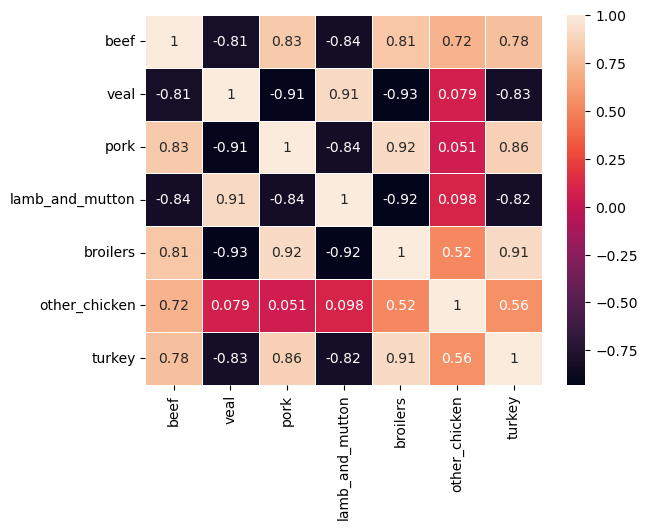

In [42]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

### Clustered heatmaps

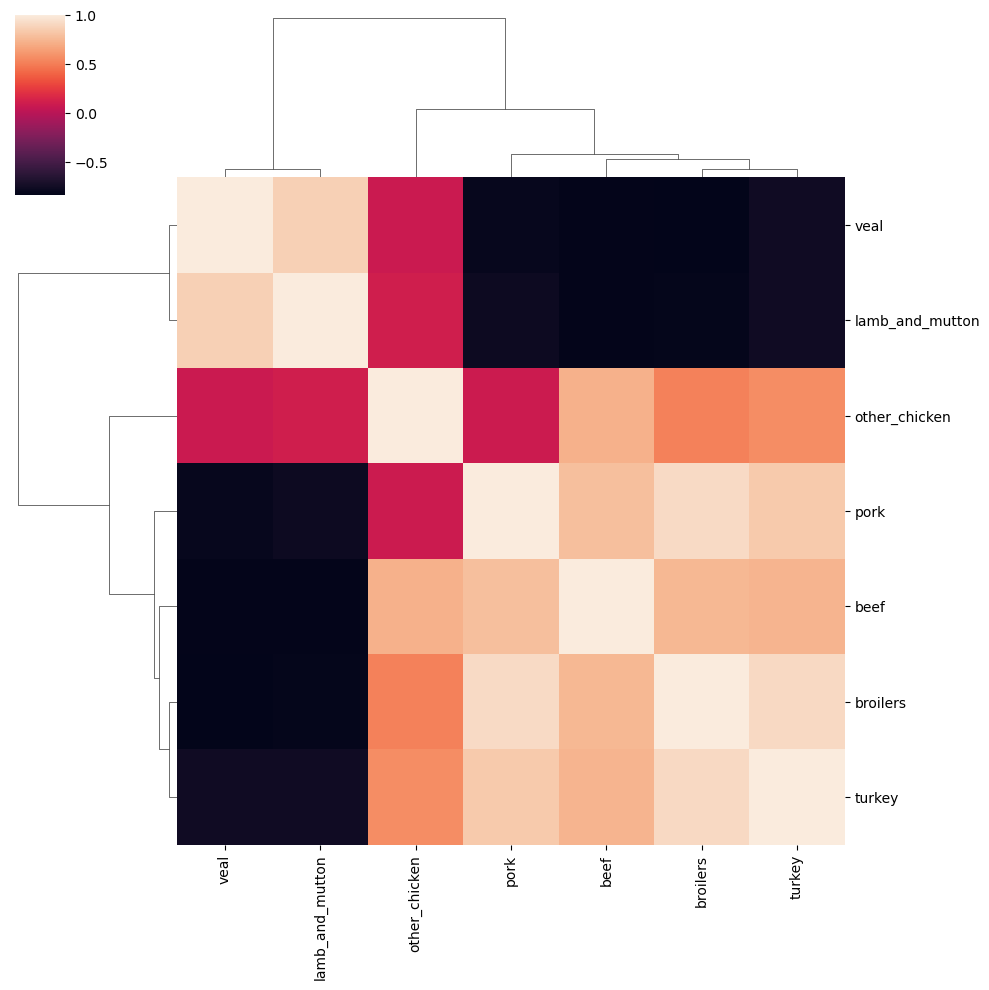

In [43]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()